In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
# checking dataset
df = pd.read_csv("Fraud detection bank.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Columns: 114 entries, Unnamed: 0 to targets
dtypes: float64(1), int64(113)
memory usage: 17.8 MB


In [3]:
# check the number of enteries and features of dataset
df.shape

(20468, 114)

In [4]:
# there are 0 duplicates in dataset
df.duplicated().sum()

0

In [5]:
# pre-processing data
# set X and y values
X = df.drop(["targets"], axis = 1).values
y = df["targets"].values


In [6]:
# training and testing X and y varaibles
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)


In [7]:
#Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Applying Logistic Regression - Classification algo
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = "liblinear")
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.9964823138557749


In [9]:
# Applying K nearest neighbor - Classification algo

# Analyze results through validation curve
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [10]:
param_range = np.array([50, 40, 35, 30, 25, 20, 15, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

train_scores, test_scores = validation_curve(KNeighborsClassifier(), X, y, param_name = "n_neighbors", param_range = param_range)

In [11]:
print(train_scores)

[[0.98949554 0.98265543 0.98198363 0.98375573 0.98680916]
 [0.99108342 0.98393795 0.98296079 0.98503817 0.98815267]
 [0.99218273 0.98552583 0.98460975 0.98601527 0.98894656]
 [0.99267131 0.98595334 0.9851594  0.98656489 0.98949618]
 [0.99346525 0.98741908 0.98668621 0.98766412 0.99083969]
 [0.99377061 0.98766337 0.98748015 0.98821374 0.99151145]
 [0.99529742 0.98986198 0.9898009  0.9900458  0.99322137]
 [0.99657994 0.98998412 0.99016734 0.99071756 0.9941374 ]
 [0.99731281 0.99132771 0.99187737 0.99212214 0.99487023]
 [0.99706852 0.99035056 0.99071699 0.99132824 0.99444275]
 [0.9975571  0.99279345 0.99236595 0.99285496 0.9959084 ]
 [0.99737389 0.99212166 0.99181629 0.99206107 0.99554198]
 [0.99798461 0.99450348 0.99407597 0.99407634 0.99694656]
 [0.99774032 0.99322096 0.99297667 0.9929771  0.99670229]
 [0.9989007  0.99603029 0.99596922 0.99584733 0.99816794]
 [0.99871748 0.99493099 0.99486992 0.9949313  0.99767939]
 [1.         1.         1.         1.         1.        ]]


In [12]:
print(np.mean(train_scores, axis = 1))

[0.9849399  0.9862346  0.98745603 0.98796902 0.98921487 0.98972786
 0.9916455  0.99231727 0.99350205 0.99278141 0.99429597 0.99378298
 0.99551739 0.99472347 0.99698309 0.99622581 1.        ]


In [13]:
print(test_scores)

[[0.73961895 0.99047386 0.98632145 0.9787442  0.85414122]
 [0.73717636 0.99193942 0.98778701 0.97923284 0.85414122]
 [0.73400098 0.99242794 0.98851979 0.98094307 0.85438554]
 [0.73009282 0.99242794 0.9890083  0.98167603 0.85365258]
 [0.72300928 0.99340498 0.98998534 0.98265331 0.85511849]
 [0.7198339  0.99364924 0.99096238 0.98265331 0.85438554]
 [0.70786517 0.99462628 0.99291646 0.98558515 0.85536281]
 [0.70639961 0.99462628 0.99340498 0.9863181  0.85462986]
 [0.69418661 0.99438202 0.99364924 0.9887613  0.85682873]
 [0.70102589 0.99462628 0.99364924 0.98705106 0.85462986]
 [0.68661456 0.9951148  0.99487054 0.9887613  0.85609577]
 [0.69345383 0.99487054 0.99364924 0.98778402 0.85487418]
 [0.68099658 0.99658036 0.9951148  0.99096018 0.85756169]
 [0.68954568 0.99560332 0.99462628 0.98973858 0.85511849]
 [0.672936   0.99780166 0.9963361  0.99218177 0.86000489]
 [0.68466048 0.9975574  0.99584758 0.9899829  0.85658441]
 [0.66609673 0.99780166 0.99682462 0.99389201 0.8626924 ]]


In [14]:
print(np.mean(test_scores, axis = 1))

[0.90985994 0.91005537 0.91005546 0.90937154 0.90883428 0.90829688
 0.90727117 0.90707577 0.90556158 0.90619647 0.9042914  0.90492636
 0.90424272 0.90492647 0.90385209 0.90492655 0.90346148]


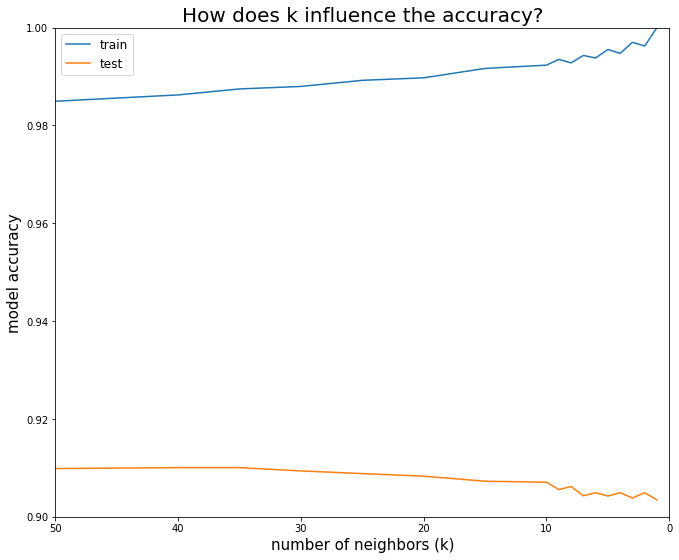

In [15]:
#Visualizing Validation Curve (Bias-Variance Dilemma) dependant from number of neighbors (k argument
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (11, 9))

plt.plot(param_range, np.mean(train_scores, axis = 1))
plt.plot(param_range, np.mean(test_scores, axis = 1))

# Reversing the X-axis (now going from 40 to 1 backwards)
plt.xlim(np.max(param_range), 0)
plt.ylim(0.9, 1)

plt.title("How does k influence the accuracy?", fontsize = 20)
plt.xlabel("number of neighbors (k)", fontsize = 15)
plt.ylabel("model accuracy", fontsize = 15)

# Adding a legend
plt.legend(["train", "test"], loc = "upper left", fontsize = 12)

plt.show()

In [16]:
# Applying Decision Tree - Classification algo
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [17]:
param_range = np.arange(1, 100)

train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X, y, param_name = "max_depth", param_range = param_range)

In [18]:
print(train_scores)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1.

In [19]:
print(np.mean(train_scores, axis = 1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]


In [20]:
print(test_scores)

[[0.63287738 1.         1.         1.         0.86733447]
 [0.63287738 1.         1.         1.         0.86733447]
 [0.63287738 1.         1.         1.         0.86733447]
 [0.63287738 1.         1.         1.         0.86733447]
 [0.63287738 1.         1.         1.         0.86733447]
 [0.63287738 1.         1.         1.         0.86733447]
 [0.63287738 1.         1.         1.         0.86733447]
 [0.63287738 1.         1.         1.         0.86733447]
 [0.63287738 1.         1.         1.         0.86733447]
 [0.63287738 1.         1.         1.         0.86733447]
 [0.63287738 1.         1.         1.         0.86733447]
 [0.63287738 1.         1.         1.         0.86733447]
 [0.63287738 1.         1.         1.         0.86733447]
 [0.63287738 1.         1.         1.         0.86733447]
 [0.63287738 1.         1.         1.         0.86733447]
 [0.63287738 1.         1.         1.         0.86733447]
 [0.63287738 1.         1.         1.         0.86733447]
 [0.63287738 1

In [21]:
print(np.mean(test_scores, axis = 1))

[0.90004237 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237
 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237
 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237
 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237
 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237
 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237
 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237
 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237
 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237
 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237
 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237
 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237
 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237
 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237
 0.90004237 0.90004237 0.90004237 0.90004237 0.90004237 0.9000

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

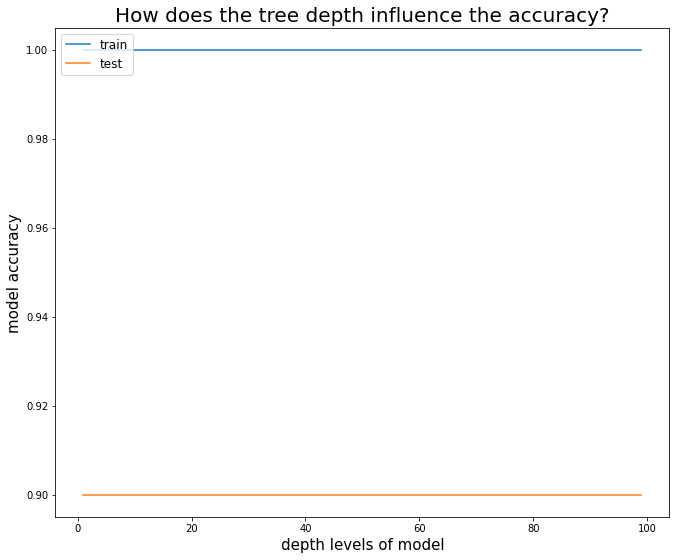

In [23]:
plt.figure(figsize = (11, 9))

plt.plot(param_range, np.mean(train_scores, axis = 1))
plt.plot(param_range, np.mean(test_scores, axis = 1))

plt.title("How does the tree depth influence the accuracy?", fontsize = 20)
plt.xlabel("depth levels of model", fontsize = 15)
plt.ylabel("model accuracy", fontsize = 15)

# Adding a legend
plt.legend(["train", "test"], loc = "upper left", fontsize = 12)

plt.show()